In [1]:

%pprint

Pretty printing has been turned OFF


In [6]:

import pandas as pd

url = 'https://covidtracking.com/api/v1/states/daily.csv'
states_df = pd.read_csv(url, usecols=['date', 'state', 'death'],
                        parse_dates=['date'], index_col=['state', 'date'],
                        squeeze=True).sort_index()
extra_state = 'FL'
states_list = [extra_state, 'NY', 'NJ']
mask_series = states_df.index.get_level_values('state').isin(states_list)
result_df = states_df[mask_series].reset_index()
#print(['result_df.{}'.format(fn) for fn in dir(result_df) if not fn.startswith('_')])
mask_series = (result_df.death > 0)
min_dict = result_df[mask_series].groupby('state').date.min().to_dict()
def f(row_series):
    date_obj = row_series.date
    state_str = row_series.state
    
    result = (date_obj - min_dict[state_str]).days
    
    return result

result_df['days'] = result_df.apply(f, axis=1)

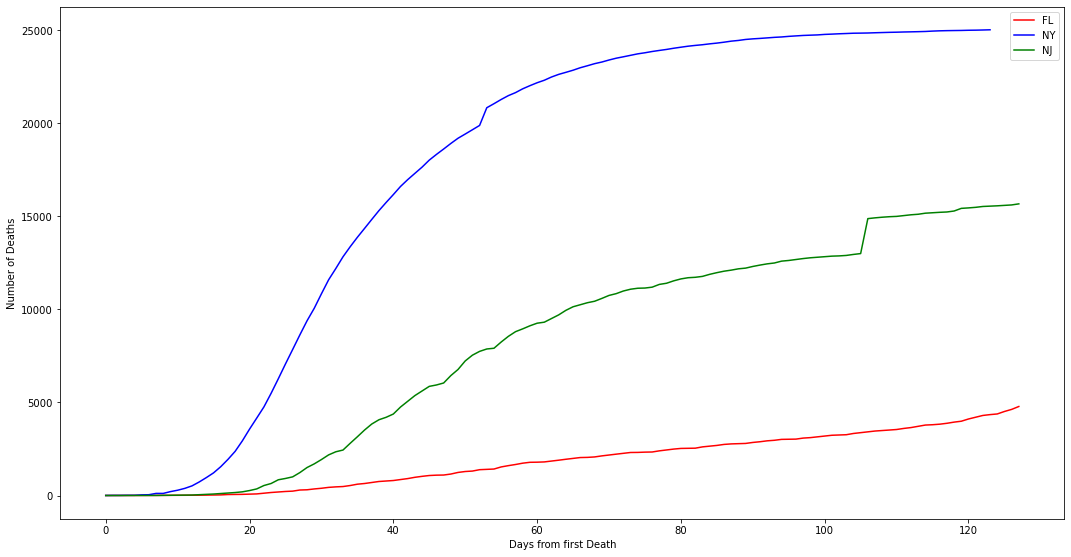

In [7]:

from matplotlib import pyplot as plt

FACEBOOK_ASPECT_RATIO = 1.91
fig, ax = plt.subplots(figsize=(18, 18/FACEBOOK_ASPECT_RATIO))
mask_series = (result_df.state == extra_state) & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='death', c='r', label=extra_state)
mask_series = (result_df.state == 'NY') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='death', c='b', label='NY')
mask_series = (result_df.state == 'NJ') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='death', c='g', label='NJ')
ax.set_xlabel('Days from first Death')
ax.set_ylabel('Number of Deaths');

In [8]:

%run ../py/storage.py
s = Storage()
states_stats_df = s.load_object('states_stats_df')
states_stats_df.columns.tolist()

['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent', 'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score', 'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score', 'Natural_Environment_Score', 'district_abbreviation', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'State_Region', 'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014', 'Homicide_Rate_2010', 'Homicide_Rate_2005', 'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016', 'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Suicide_Rate_2014', 'Suicide_Deaths_2014', 'Suicide_Rate_2005', 'Suicide_Deaths_2005', 'Total_Inhabitants_2010', 'Inhabitants_Per_Square_Mile_2010', 'Total_Murder_Deaths_2010', 'Total_Gun_Murder_Deaths_2010', 'Gun_Ownership_Percent_201

In [9]:

states_list = [extra_state, 'NY', 'NJ']
mask_series = states_stats_df.State_Abbreviation.isin(states_list)
columns_list = ['State_Abbreviation', 'Census_Estimate_2019']
df = states_stats_df[mask_series][columns_list]
df.set_index('State_Abbreviation', inplace=True)
pop_dict = df.Census_Estimate_2019.to_dict()
def f(row_series):
    deaths = row_series.death
    state_str = row_series.state
    population = pop_dict[state_str]
    deaths_per_capita = deaths/population
    
    return deaths_per_capita

result_df['deaths_per_capita'] = result_df.apply(f, axis=1)

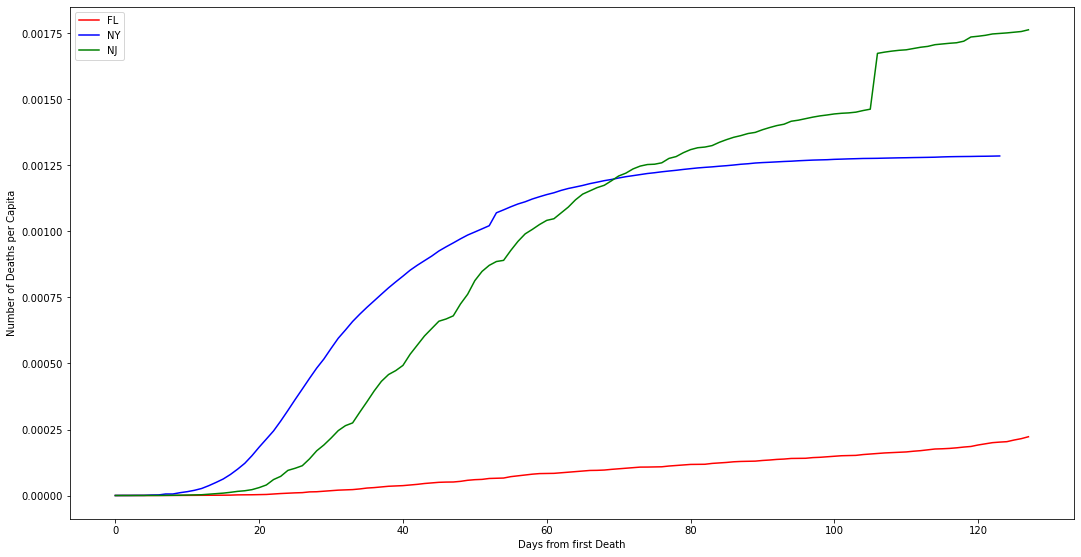

In [10]:

from matplotlib import pyplot as plt

FACEBOOK_ASPECT_RATIO = 1.91
fig, ax = plt.subplots(figsize=(18, 18/FACEBOOK_ASPECT_RATIO))
mask_series = (result_df.state == extra_state) & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_capita', c='r', label=extra_state)
mask_series = (result_df.state == 'NY') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_capita', c='b', label='NY')
mask_series = (result_df.state == 'NJ') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_capita', c='g', label='NJ')
ax.set_xlabel('Days from first Death')
ax.set_ylabel('Number of Deaths per Capita');

In [11]:

def f(row_series):
    deaths = row_series.death
    deaths_per_million = deaths/10e6
    
    return deaths_per_million

result_df['deaths_per_million'] = result_df.apply(f, axis=1)

In [12]:

result_df

,state,date,death,days,deaths_per_capita,deaths_per_million
0,FL,2020-03-04,NaN,-7,NaN,NaN
1,FL,2020-03-05,NaN,-6,NaN,NaN
2,FL,2020-03-06,NaN,-5,NaN,NaN
3,FL,2020-03-07,NaN,-4,NaN,NaN
4,FL,2020-03-08,NaN,-3,NaN,NaN
...,...,...,...,...,...,...
399,NY,2020-07-12,24979.0,119,0.001284,0.002498
400,NY,2020-07-13,24989.0,120,0.001285,0.002499
401,NY,2020-07-14,24994.0,121,0.001285,0.002499
402,NY,2020-07-15,25003.0,122,0.001285,0.002500


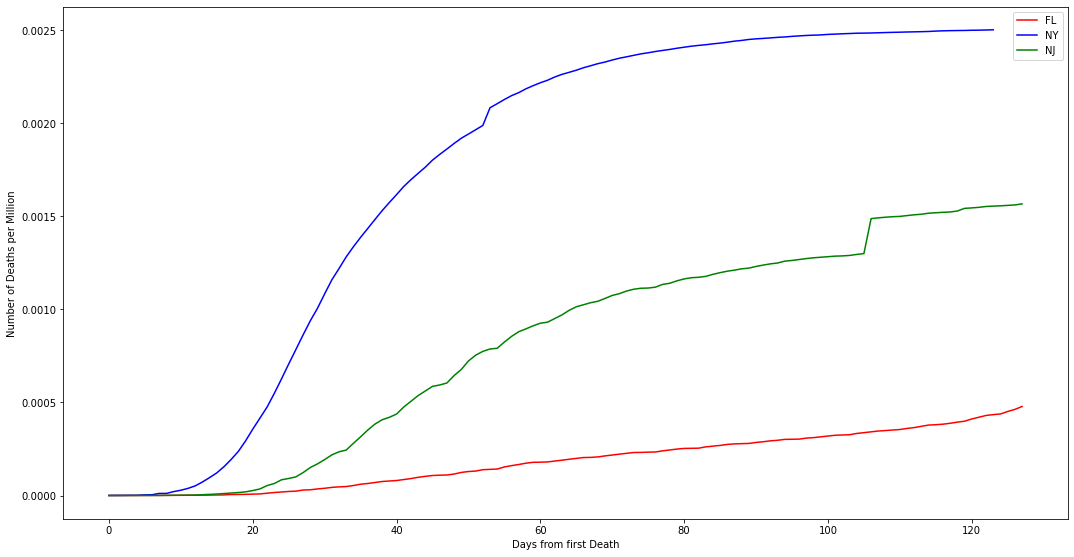

In [13]:

from matplotlib import pyplot as plt

FACEBOOK_ASPECT_RATIO = 1.91
fig, ax = plt.subplots(figsize=(18, 18/FACEBOOK_ASPECT_RATIO))
mask_series = (result_df.state == extra_state) & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_million', c='r', label=extra_state)
mask_series = (result_df.state == 'NY') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_million', c='b', label='NY')
mask_series = (result_df.state == 'NJ') & (result_df.days >= 0)
result_df[mask_series].plot(ax=ax, x='days', y='deaths_per_million', c='g', label='NJ')
ax.set_xlabel('Days from first Death')
ax.set_ylabel('Number of Deaths per Million');

In [16]:

'(' + '|'.join(states_stats_df.index.tolist()) + ')'

'(Alabama|Alaska|American Samoa|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|District of Columbia|Florida|Georgia|Guam|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Midwest Region|Minnesota|Mississippi|Missouri|Montana|N. Mariana Islands|Nebraska|Nevada|New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|Northeast Region|Ohio|Oklahoma|Oregon|Pennsylvania|Puerto Rico|Rhode Island|South Carolina|South Dakota|South Region|Tennessee|Texas|U.S. Virgin Islands|United States|Utah|Vermont|Virginia|Washington|West Region|West Virginia|Wisconsin|Wyoming)'